# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

with open("image_predictions.tsv", mode="w") as file:
    file.write(r.text)

In [3]:
df_predictions = pd.read_csv("image_predictions.tsv", sep="\t")
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
auth = tweepy.OAuth1UserHandler(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [ ]:
with open("tweet_json.txt", mode="w", encoding="utf-8") as file:
    for tweet_id in list(df_archive.tweet_id):
        try:
            file.write(f"{json.dumps(api.get_status(tweet_id))}\n")
            print(tweet_id)
        except Exception as e:
            print(f"An error occured for {tweet_id}: {e}")

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
An error occured for 888202515573088257: 404 Not Found
144 - No status found with that ID.
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
8829920803642204

Rate limit reached. Sleeping for: 248


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
An error occured for 754011816964026368: 404 Not Found
144 - No status found with that ID.
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
7523345159310540

Rate limit reached. Sleeping for: 285


676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206

In [4]:
list_twitter = []

with open("tweet_json.txt", encoding="utf-8") as json_file:
    for line in json_file.readlines():
        data = json.loads(line)
        list_twitter.append({"tweet_id": data["id"], "favorite_count": data["favorite_count"], "retweet_count": data["retweet_count"]})

In [5]:
df_json = pd.DataFrame(list_twitter)
df_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33736,6981
1,892177421306343426,29265,5284
2,891815181378084864,22000,3468
3,891689557279858688,36843,7203
4,891327558926688256,35231,7726


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
df_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33736,6981
1,892177421306343426,29265,5284
2,891815181378084864,22000,3468
3,891689557279858688,36843,7203
4,891327558926688256,35231,7726
...,...,...,...
2322,666049248165822465,88,36
2323,666044226329800704,246,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [12]:
df_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [13]:
df_archive.text.duplicated().any()

False

In [14]:
df_json[df_json.favorite_count.duplicated()]

,tweet_id,favorite_count,retweet_count
35,885311592912609280,0,15392
67,879130579576475649,0,5720
72,878404777348136964,0,1074
73,878316110768087041,0,5511
77,877611172832227328,0,70
...,...,...,...
2304,666337882303524864,168,79
2305,666293911632134144,425,289
2315,666071193221509120,127,51
2316,666063827256086533,396,180


In [15]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
list(df_predictions.p1.unique())

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'Labrador_retriever',
 'seat_belt',
 'snail',
 'miniature_schnauzer',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'jigsaw_puzzle',
 'West_Highland_white_terrier',
 'toy_poodle',
 'giant_schnauzer',
 'vizsla',
 'vacuum',
 'Rottweiler',
 'Siberian_husky',
 'teddy',
 'papillon',
 'Saint_Bernard',
 'porcupine',
 'go

In [17]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Quality issues
1. Some tweet ids are no longer valid (deleted tweets)

2. Some of the entries in the `predictions` table are not valid dogs

3. The `archive` table contains 'None' entries with are not interpreted as NaN

4. Wrong data type for timestamp colum of `df_archive`

5. There should be a column for the correct dog predictions. The dog predictions should be of a categorical dtype

6. Some of entries are retweets

7. Some of the dog names in the `archive` table are not valid names e.g. an, the

8. Some of the ratings are not correct

### Tidiness issues
1. The `df_json` and `df_predictions` tables should be part of the `df_archive` table

2. The `doggo`, `floofer`, `pupper`, and `puppo` columns represent the same feature

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_predictions_copy = df_predictions.copy()
df_json_copy = df_json.copy()

### Missing Data

#### Define
Replace all 'None' entries in the `archive` table with Nan by using `df.replace`

#### Code

In [19]:
df_archive_copy.replace('None', np.nan, inplace=True)

#### Test

In [20]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Tidiness Issues

#### Define:
Join `json` and `predictions` tables to `archive` table with `pd.merge`. This will also fix the issue of invalid tweet id's in the `archive` table

#### Code

In [21]:
df_archive_copy = pd.merge(df_archive_copy, df_json_copy, how='right', on='tweet_id')
df_archive_copy = pd.merge(df_archive_copy, df_predictions_copy, how='left', on='tweet_id')

#### Test

In [22]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2327 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2327 non-null   object 
 4   source                      2327 non-null   object 
 5   text                        2327 non-null   object 
 6   retweeted_status_id         160 non-null    float64
 7   retweeted_status_user_id    160 non-null    float64
 8   retweeted_status_timestamp  160 non-null    object 
 9   expanded_urls               2269 non-null   object 
 10  rating_numerator            2327 non-null   int64  
 11  rating_denominator          2327 non-null   int64  
 12  name                        1595 non-null   object 
 13  doggo                       94 no

#### Define
Merge the `doggo`, `floofer`, `pupper`, and `puppo` columns into one column with `pd.melt()`

#### Code

In [23]:
id_columns = df_archive_copy.columns.difference(['doggo', 'floofer', 'pupper', 'puppo'])
df_archive_copy = pd.melt(df_archive_copy, id_vars=id_columns, var_name='dogs', value_name='dog_stage').drop(columns=['dogs'])

In [24]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   expanded_urls               9076 non-null   object 
 1   favorite_count              9308 non-null   int64  
 2   img_num                     8228 non-null   float64
 3   in_reply_to_status_id       312 non-null    float64
 4   in_reply_to_user_id         312 non-null    float64
 5   jpg_url                     8228 non-null   object 
 6   name                        6380 non-null   object 
 7   p1                          8228 non-null   object 
 8   p1_conf                     8228 non-null   float64
 9   p1_dog                      8228 non-null   object 
 10  p2                          8228 non-null   object 
 11  p2_conf                     8228 non-null   float64
 12  p2_dog                      8228 non-null   object 
 13  p3                          8228 

In [25]:
dog_copy = df_archive_copy[df_archive_copy.dog_stage.notna()]
col_on = dog_copy.columns.difference(['tweet_id', 'dog_stage'])

dog_copy = dog_copy.drop(columns=col_on)
dog_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 9 to 8036
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   389 non-null    int64 
 1   dog_stage  389 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [26]:
origin = df_archive_copy[~df_archive_copy.tweet_id.duplicated()]
origin = origin.drop(columns=['dog_stage'])
origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   expanded_urls               2269 non-null   object 
 1   favorite_count              2327 non-null   int64  
 2   img_num                     2057 non-null   float64
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
 5   jpg_url                     2057 non-null   object 
 6   name                        1595 non-null   object 
 7   p1                          2057 non-null   object 
 8   p1_conf                     2057 non-null   float64
 9   p1_dog                      2057 non-null   object 
 10  p2                          2057 non-null   object 
 11  p2_conf                     2057 non-null   float64
 12  p2_dog                      2057 non-null   object 
 13  p3                          2057 

In [27]:
df_archive_copy = pd.merge(left=origin, right=dog_copy, on='tweet_id', how='left')

#### Test

In [28]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   expanded_urls               2283 non-null   object 
 1   favorite_count              2341 non-null   int64  
 2   img_num                     2070 non-null   float64
 3   in_reply_to_status_id       79 non-null     float64
 4   in_reply_to_user_id         79 non-null     float64
 5   jpg_url                     2070 non-null   object 
 6   name                        1601 non-null   object 
 7   p1                          2070 non-null   object 
 8   p1_conf                     2070 non-null   float64
 9   p1_dog                      2070 non-null   object 
 10  p2                          2070 non-null   object 
 11  p2_conf                     2070 non-null   float64
 12  p2_dog                      2070 non-null   object 
 13  p3                          2070 

In [29]:
df_archive_copy.columns

Index(['expanded_urls', 'favorite_count', 'img_num', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'jpg_url', 'name', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'rating_denominator', 'rating_numerator', 'retweet_count',
       'retweeted_status_id', 'retweeted_status_timestamp',
       'retweeted_status_user_id', 'source', 'text', 'timestamp', 'tweet_id',
       'dog_stage'],
      dtype='object')

In [30]:
df_archive_copy.dog_stage.value_counts()

pupper     255
doggo       94
puppo       30
floofer     10
Name: dog_stage, dtype: int64

### Quality Issues

#### Define
Entries that have a `retweeted_status_id` value (retweets) should be dropped

#### Code

In [31]:
df_archive_copy[df_archive_copy[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']].isna()]

,expanded_urls,favorite_count,img_num,in_reply_to_status_id,in_reply_to_user_id,jpg_url,name,p1,p1_conf,p1_dog,...,rating_numerator,retweet_count,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_archive_copy = df_archive_copy[(df_archive_copy.retweeted_status_id.isna() & df_archive_copy.in_reply_to_status_id.isna())]
df_archive_copy = df_archive_copy[(df_archive_copy.retweeted_status_timestamp.isna() & df_archive_copy.in_reply_to_status_id.isna() & df_archive_copy.in_reply_to_user_id.isna())]

#### Test

In [33]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2340
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   expanded_urls               2097 non-null   object 
 1   favorite_count              2100 non-null   int64  
 2   img_num                     1973 non-null   float64
 3   in_reply_to_status_id       0 non-null      float64
 4   in_reply_to_user_id         0 non-null      float64
 5   jpg_url                     1973 non-null   object 
 6   name                        1492 non-null   object 
 7   p1                          1973 non-null   object 
 8   p1_conf                     1973 non-null   float64
 9   p1_dog                      1973 non-null   object 
 10  p2                          1973 non-null   object 
 11  p2_conf                     1973 non-null   float64
 12  p2_dog                      1973 non-null   object 
 13  p3                          1973 

#### Define
Change the `timestamp` column of the archive table to a datetime object with `pd.to_datetime()`

#### Code

In [34]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

#### Test

In [35]:
df_archive_copy.timestamp.dtype

datetime64[ns, UTC]

#### Define

Create a new column for the most confident dog breed prediction. Remove null  entries and convert the column to categorical dtype

#### Code

In [36]:
df_archive_copy = df_archive_copy.reset_index()

In [37]:
dog_breed_list = []

for i in range(df_archive_copy.p1.shape[0]):
    if df_archive_copy.p1_dog[i]:
        dog_breed_list.append(df_archive_copy.p1[i])
    elif df_archive_copy.p2_dog[i]:
        dog_breed_list.append(df_archive_copy.p2[i])
    elif df_archive_copy.p3_dog[i]:
        dog_breed_list.append(df_archive_copy.p3[i])
    else:
        dog_breed_list.append('')

In [38]:
df_archive_copy['dog_breed'] = pd.Series(dog_breed_list)

In [39]:
dog_set = set(df_archive_copy.dog_breed.dropna())

In [40]:
dog_set

{'',
 'Afghan_hound',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Irish_wolfhound',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_sheepdog',
 'Pekinese',
 'Pembroke',
 'Pomeranian',

In [41]:
dog_categories = pd.CategoricalDtype(categories=dog_set)
df_archive_copy.dog_breed = df_archive_copy.dog_breed.astype(dog_categories)

In [42]:
df_archive_copy.dog_breed = df_archive_copy.dog_breed.replace({'': np.nan})

#### Test

In [43]:
df_archive_copy.dog_breed

0                          NaN
1                    Chihuahua
2                    Chihuahua
3           Labrador_retriever
4                       basset
                 ...          
2095        miniature_pinscher
2096       Rhodesian_ridgeback
2097           German_shepherd
2098                   redbone
2099    Welsh_springer_spaniel
Name: dog_breed, Length: 2100, dtype: category
Categories (113, object): ['German_shepherd', 'keeshond', 'clumber', 'Lakeland_terrier', ..., 'chow', 'Bouvier_des_Flandres', 'Airedale', 'Welsh_springer_spaniel']

In [44]:
df_archive_copy.dog_breed.value_counts()

golden_retriever      160
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
                     ... 
Scotch_terrier          1
silky_terrier           1
EntleBucher             1
Irish_wolfhound         1
standard_schnauzer      1
Name: dog_breed, Length: 113, dtype: int64

In [45]:
df_archive_copy.dog_breed.dtype

CategoricalDtype(categories=['German_shepherd', 'keeshond', 'clumber', 'Lakeland_terrier',
                  'schipperke', 'Boston_bull', 'Australian_terrier',
                  'Cardigan', 'malinois', 'bloodhound',
                  ...
                  'standard_poodle', 'Weimaraner', 'Scotch_terrier',
                  'Tibetan_terrier', 'Sussex_spaniel', 'Scottish_deerhound',
                  'chow', 'Bouvier_des_Flandres', 'Airedale',
                  'Welsh_springer_spaniel'],
, ordered=False)

#### Define
Replace the entries in the `name` column of the `archive` table that are not valid names with NaN. They all begin with lowercase letters

#### Code

In [46]:
df_archive_copy = df_archive_copy.reset_index()

In [47]:
lower_names_index = df_archive_copy.name.loc[(df_archive_copy.name.str.islower()).replace({np.nan: False})].index
lower_names_index

Int64Index([  21,   51,  140,  156,  262,  287,  424,  495,  618,  633,
            ...
            2079, 2089, 2090, 2091, 2092, 2093, 2094, 2096, 2097, 2098],
           dtype='int64', length=105)

In [48]:
df_archive_copy.name.iloc[lower_names_index] = np.nan

C:\Users\oluwa\AppData\Local\Temp\ipykernel_24448\2283831200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy.name.iloc[lower_names_index] = np.nan


#### Test

In [49]:
df_archive_copy.name.str.islower().sum()

0

#### Define
Fill `rating_numerator` column with correct ratings

#### Code

In [50]:
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype('float')

In [51]:
df_archive_copy.rating_numerator = df_archive_copy.text.str.extract(r'(\d+)/10')

In [52]:
decimal_rating = df_archive_copy[df_archive_copy.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]
decimal_rating


C:\Users\oluwa\AppData\Local\Temp\ipykernel_24448\1916726538.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  decimal_rating = df_archive_copy[df_archive_copy.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,5
529,"This is Logan, the Chow who lived. He solemnly...",75
588,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1478,Here we have uncovered an entire battalion of ...,26


In [53]:
df_archive_copy.rating_numerator.iloc[decimal_rating.index] = (decimal_rating.text.str.extract(r'(\d+\.\d*)').astype(float))[0]

C:\Users\oluwa\AppData\Local\Temp\ipykernel_24448\256797140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy.rating_numerator.iloc[decimal_rating.index] = (decimal_rating.text.str.extract(r'(\d+\.\d*)').astype(float))[0]


#### Test

In [54]:
df_archive_copy.rating_numerator.dtype

dtype('O')

In [55]:
df_archive_copy.rating_numerator.value_counts()

12       490
10       436
11       415
13       286
9        153
8         98
7         51
14        39
5         34
6         32
3         19
4         15
2          9
1          4
1776       1
11.26      1
11.27      1
9.75       1
0          1
13.5       1
420        1
Name: rating_numerator, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
df_master = df_archive_copy

In [57]:
df_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
df_master.dog_breed.value_counts()

golden_retriever      160
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
                     ... 
Scotch_terrier          1
silky_terrier           1
EntleBucher             1
Irish_wolfhound         1
standard_schnauzer      1
Name: dog_breed, Length: 113, dtype: int64

In [59]:
df_master.rating_numerator.value_counts()

12       490
10       436
11       415
13       286
9        153
8         98
7         51
14        39
5         34
6         32
3         19
4         15
2          9
1          4
1776       1
11.26      1
11.27      1
9.75       1
0          1
13.5       1
420        1
Name: rating_numerator, dtype: int64

In [60]:
dog_stage_mean = df_master[['dog_stage', 'favorite_count']].groupby('dog_stage').mean()
dog_stages = dog_stage_mean.index
dog_stage_mean

,favorite_count
dog_stage,
doggo,16123.475610
floofer,9921.000000
pupper,6447.639130
puppo,20434.291667


### Insights:
1. There are more golden retrievers in this dataset than any other breed

2. 12/10 was the most common rating followed by 10/10.

3. Puppos have the highest favorite counts. Although I did not take into account missing dog stages values

### Visualization

Text(0.5, 1.0, 'Plot Showing the Average Favorite Count of the Dog Stages')

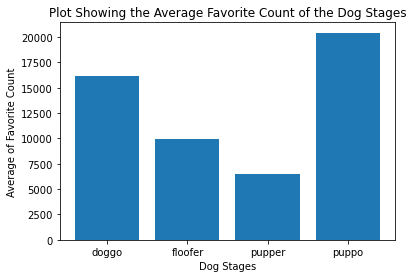

In [61]:
plt.bar(dog_stages, dog_stage_mean.favorite_count)
plt.xlabel('Dog Stages')
plt.ylabel('Average of Favorite Count')
plt.title('Plot Showing the Average Favorite Count of the Dog Stages')

Text(0.5, 1.0, 'Plot Showing the Count of all Dog Breeds')

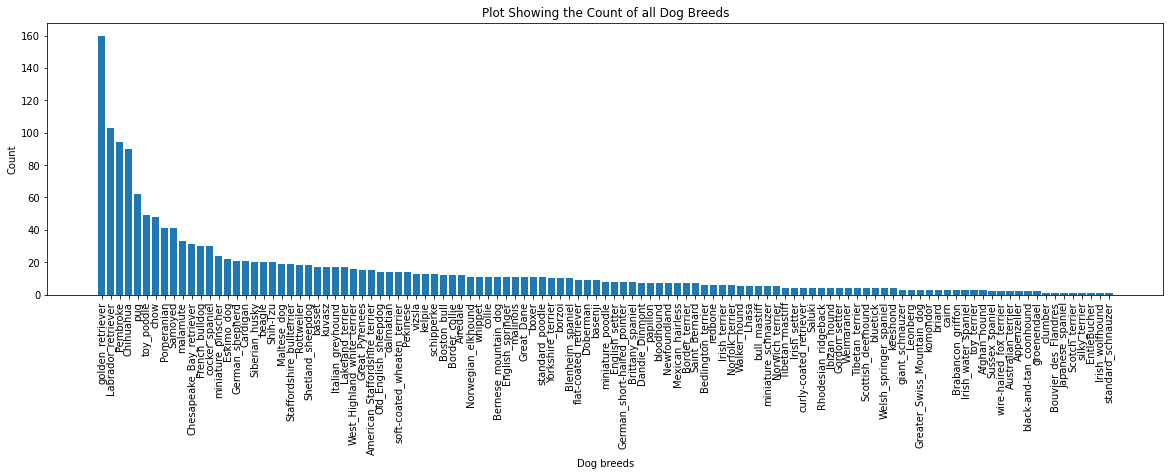

In [62]:
plt.figure(figsize=(20, 5))
plt.bar(df_master.dog_breed.value_counts().index, df_master.dog_breed.value_counts())
plt.xlabel('Dog breeds')
plt.ylabel('Count')
plt.xticks(rotation=90);
plt.title('Plot Showing the Count of all Dog Breeds')